C:\Users\santhosh\AppData\Local\Temp\ipykernel_6436\3674426301.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  xgb = pd.read_csv("../visualization/XGBoost_sales_forecast.csv")


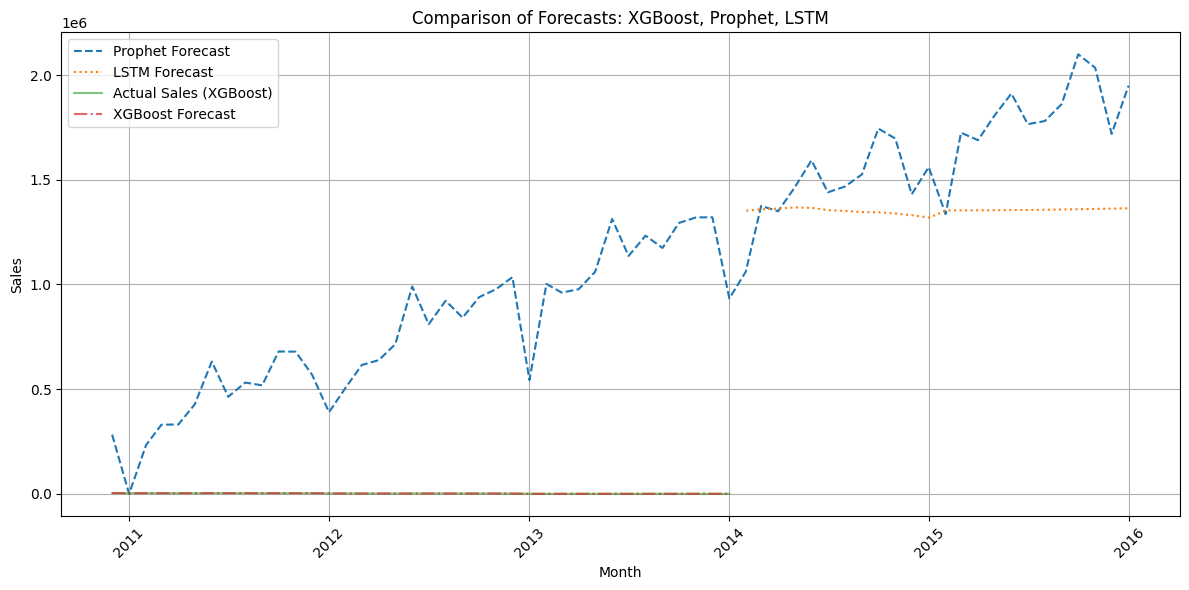

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all forecast files
xgb = pd.read_csv("../visualization/XGBoost_sales_forecast.csv")
prophet = pd.read_csv("../visualization/prophet_sales_forecast.csv")
lstm = pd.read_csv("../visualization/lstm_sales_forecast.csv")

# Format dates
prophet['ds'] = pd.to_datetime(prophet['ds'])
lstm['Month'] = pd.to_datetime(lstm['Month'])

# Extract EnglishMonthName from one-hot columns
month_cols = [col for col in xgb.columns if col.startswith("EnglishMonthName_")]
def extract_month(row):
    for col in month_cols:
        if row[col] == 1:
            return col.replace("EnglishMonthName_", "")
    return None

xgb['EnglishMonthName'] = xgb.apply(extract_month, axis=1)

# Construct proper datetime Month column
xgb['Month'] = xgb['CalendarYear'].astype(str) + '-' + xgb['EnglishMonthName']
xgb['Month'] = pd.to_datetime(xgb['Month'], format="%Y-%B", errors='coerce')


# Plot all forecasts
plt.figure(figsize=(12, 6))

# Prophet Forecast
plt.plot(prophet['ds'], prophet['yhat'], label="Prophet Forecast", linestyle='--')

# LSTM Forecast
plt.plot(lstm['Month'], lstm['PredictedSales'], label="LSTM Forecast", linestyle=':')

# Actual Sales from XGBoost
if 'ActualSales' in xgb.columns:
    xgb_grouped = xgb.groupby('Month').agg({'ActualSales': 'mean'}).reset_index()
    plt.plot(xgb_grouped['Month'], xgb_grouped['ActualSales'], label="Actual Sales (XGBoost)", alpha=0.6)

# XGBoost Forecast
if 'PredictedSales' in xgb.columns:
    xgb_pred_grouped = xgb.groupby('Month').agg({'PredictedSales': 'mean'}).reset_index()
    plt.plot(xgb_pred_grouped['Month'], xgb_pred_grouped['PredictedSales'], label="XGBoost Forecast", linestyle='-.', alpha=0.7)

# Styling
plt.title("Comparison of Forecasts: XGBoost, Prophet, LSTM")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
